## Prepared by:

Nazzeef Nazri

a1621410

# Assessment 3 - Case Study Report

This notebook will demonstrate the application of a supervised machine learning model using the historical Apple stock data extracted from Yahoo Finance. 

The machine learning pipeline has six main steps:

 1. Problem definition where you define your problem;
 2. Data ingestion where you collect your data;
 3. Data preparation where you clean your data;
 4. Data segregation where you separate your data;
 5. Model training where you use the machine learning algorithms;
 6. Candidate model evaluation where you evaluate the models you have used.

# Step 1: Problem Statement

1. Can supervised machine learning models predict the next day stock returns in order to generate profitable trading signals?
2. Can these models explain which technical indicators are best at predicting next day stock returns, and by extension, the trading strategy to adopt for a particular stock?

# Step 2: Data ingestion

We collected the historical Apple Stock data from Yahoo Finance with the dates ranging from 1st April 2016 to 1st April 2021 (5 years historical data)

The Apple stock is synonymously referred in the stock exchange with the ticker symbol 'AAPL'. 

The steps for collecting the data using the yfinance package is found described by Shah (2020). 

The **Apple Stock dataset** has 7 variables and 1321 rows of stock data. The data consists of Open-High-Low-Close prices and Volume data. They are as follows: 
* `Date`: The date the stock data is published
* `Open`: The price that the AAPL stock started trading for the day
* `High`: The maximum AAPL stock price at a given time period for the day
* `Low`: The minimum AAPL stock price at a given time period for the day
* `Close`: The price that the AAPL stock ended trading for the day
* `Adj Close`: The price that the AAPL stock ended trading for the day adjusted for corporate actions such as dividends, stock splits, and new share issuance.
* `Volume`: The total amount of trading activity for the AAPL stock. 


The predictor and target variables will be created using this raw data.

#### 2.1 Collecting the data:

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# To extract historical stock data 
import yfinance as yf

# For producing technical indicators
import talib as ta

# For plotting graphs
import matplotlib.pyplot as plt 
import matplotlib as mpl

# To access datetime
from datetime import datetime    
%matplotlib inline

# To ignore the warnings
import warnings                   
warnings.filterwarnings("ignore")

In [2]:
df_aapl = pd.read_csv('AAPL.csv', index_col=0)
df_aapl.index = pd.to_datetime(df_aapl.index)
df_aapl.tail(3)

,Open,High,Low,Close,Adj Close,Volume,year,month,Close_FD,High_FD,...,upperband,middleband,lowerband,RSI_FD,ret1,std5,std10,std20,std40,actual_return
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200,2021,Mar,0.613622,0.618564,...,0.624029,0.608350,0.592671,50.341088,-0.001268,0.026046,0.033991,0.047649,0.042238,-0.021684
2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900,2021,Mar,0.600316,0.596327,...,0.622586,0.606138,0.589689,47.840760,-0.021684,0.023034,0.034493,0.044672,0.040817,0.042744
2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800,2021,Mar,0.625976,0.632107,...,0.629333,0.612715,0.596098,52.717916,0.042744,0.024987,0.036543,0.045121,0.041375,-0.004713


# Step 3: Data Preparation

## 3.1 Store the target and input features that will feed the models

#### 3.1.1 Storing input features into X

In [3]:
predictor_list = ['ADX_FD', 'SMA_FD', 'macd', 'macdsignal', 'macdhist', 'upperband', 'middleband', 'lowerband', 'RSI_FD', 'Close_FD',
'Volume', 'std5', 'std10', 'std20', 'std40']

X = df_aapl[predictor_list]
X.head()

,ADX_FD,SMA_FD,macd,macdsignal,macdhist,upperband,middleband,lowerband,RSI_FD,Close_FD,Volume,std5,std10,std20,std40
Date,,,,,,,,,,,,,,,
2016-09-06,10.580275,0.403045,0.002523,0.002877,-0.000354,0.410767,0.403261,0.395755,50.969145,0.408346,106405600,0.013168,0.018303,0.035416,0.040317
2016-10-06,10.809941,0.404521,0.001771,0.002656,-0.000884,0.411479,0.402950,0.394420,46.102008,0.395745,126851600,0.020629,0.020060,0.034292,0.040462
2016-06-13,10.246592,0.404583,0.000274,0.002180,-0.001905,0.415526,0.398940,0.382354,42.262212,0.384613,152082000,0.020359,0.020752,0.033499,0.039786
2016-06-14,9.723483,0.403251,-0.000040,0.001736,-0.001775,0.412627,0.397051,0.381474,46.886776,0.395419,127727600,0.026663,0.022793,0.024898,0.039781
2016-06-15,9.425555,0.403046,-0.000456,0.001297,-0.001754,0.410673,0.395479,0.380286,46.097859,0.393275,117780800,0.026546,0.020267,0.021232,0.039612


#### 3.1.2 Storing target variable into y

In [4]:
target_list = ['actual_return']
y = df_aapl[target_list]
y.head()

,actual_return
Date,
2016-09-06,-0.030858
2016-10-06,-0.028131
2016-06-13,0.028097
2016-06-14,-0.005422
2016-06-15,0.017521


# Step 4: Data Segregation

We will split the dataset into two parts, first 80% of the dataset will use to create the model and the remaining 20% will be used as a test dataset.

In [5]:
split_percentage = 0.8
split = int(split_percentage*len(X))
# Train data set
X_train = X[:split]
y_train = y[:split]
# Test data set
X_test = X[split:]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(968, 15) (968, 1)
(243, 15) (243, 1)


# Step 5: Model training

 
## 5.1 Establishing a Naive baseline

In [6]:
baseline = np.mean(y_train)

#Get an array with baseline with the size of the testing dataset 
y_predicted_naive = np.repeat(baseline, len(y_test))

from sklearn.metrics import r2_score
R2_naive = r2_score(y_test, y_predicted_naive)
print('Baseline:')
print('The naive R-squared baseline is', R2_naive)

Baseline:
The naive R-squared baseline is -5.179180820436002e-06


## 5.2 Fitting the model using Support Vector Machine Regressor

SVM is affected by the range in the variables. This is because it uses distances between the data points to determine their similarity. Furthermore, SVR with RBF kernel assumes that all the variables are centred around zero and variance is of the same order (Bhandari 2020). 

Accordingly, we will apply the min-max transformation in order to transform the values of the variables to fall within the bounded intervals (min and max). 

In [7]:
# Normalisation 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
# Importing SVR
from sklearn.svm import SVR
# Making a pipeline
from sklearn.pipeline import make_pipeline

svr = SVR()

# We build a model with MinMaxScaler and SVR
svr_model1 = make_pipeline(scaler, svr)
svr_model1

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [9]:
# Fit the SVR model
svr_model1.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [10]:
#Prediction in the training dataset
y_svr_train_predict1 = svr_model1.predict(X_train)

# Prediction in the testing dataset 
y_svr_test_predict1 = svr_model1.predict(X_test) 

#### 5.2.1 Evaluating the performance of the model prior to Hyperparameter Tuning 

In [11]:
# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training1 = r2_score(y_train, y_svr_train_predict1)

R2_test1 = r2_score(y_test, y_svr_test_predict1)

In [12]:
print('R-squared score')
print('Training data:')
print('The model performance (before hyperparameter tuning) in training dataset is ', R2_training1)
print()
print('R-squared score')
print('Testing data:')
print('The model performance (before hyperparameter tuning) in testing dataset is ', R2_test1)

R-squared score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  0.21146677512800482

R-squared score
Testing data:
The model performance (before hyperparameter tuning) in testing dataset is  -0.5528578527870651


Based on the above, the training set performed significantly better than the test set signifying that the model is prone to overfitting. 

In order to address the above, we will perform hyperparameter tuning. 

## 5.3 Hyperparameter tuning of Support Vector Machine Regressor

In [13]:
# We build a model with MinMaxScaler and SVR
svr_model2 = make_pipeline(scaler, svr)
svr_model2

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [14]:
svr_model2.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [15]:
# hyperparameters currently in use by our SVR model
svr_model2.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()), ('svr', SVR())],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'svr': SVR(),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

### 5.3.1 RandomizedSearchCV

When the dimensionality of the grid is high, the number of computations in Grid Search increases drastically, making it computationally expensive.

Randomized Search is given the number of iterations to be computed and hence is computationally less expensive with a similar level of accuracy as Grid Search, making it a better choice when the dimensionality is high (De Prado 2018).

In [16]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# C
C = [int(x) for x in np.linspace(start = 1000, stop = 100000, num = 10)]

# Epsilon
epsilon = [int(x) for x in np.linspace(start = 0.01, stop = 10, num = 10)]

# Gamma
gamma = [int(x) for x in np.linspace(start = 0.01, stop = 10, num = 10)]

# Types of kernel
kernel = ['linear', 'rbf']

# Create the random grid
svr_random_grid = {'svr__C': C,
               'svr__epsilon': epsilon,
               'svr__gamma': gamma,
               'svr__kernel': kernel}

print(svr_random_grid)

{'svr__C': [1000, 12000, 23000, 34000, 45000, 56000, 67000, 78000, 89000, 100000], 'svr__epsilon': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10], 'svr__gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10], 'svr__kernel': ['linear', 'rbf']}


In [17]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svr_random = RandomizedSearchCV(estimator = svr_model2, param_distributions = svr_random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
svr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('svr', SVR())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'svr__C': [1000, 12000, 23000, 34000,
                                                   45000, 56000, 67000, 78000,
                                                   89000, 100000],
                                        'svr__epsilon': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 10],
                                        'svr__gamma': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 10],
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, verbose=2)

In [18]:
# We can view the best parameters from fitting the random search
svr_random.best_params_

{'svr__kernel': 'linear', 'svr__gamma': 6, 'svr__epsilon': 0, 'svr__C': 12000}

In [19]:
# We then assign the values of the hyperparameters into our model
svr_model2 = svr_random.best_estimator_
svr_model2

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=12000, epsilon=0, gamma=6, kernel='linear'))])

In [20]:
# Fitting the model after hyperparameter tuning:
svr_model2.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=12000, epsilon=0, gamma=6, kernel='linear'))])

### 5.3.2 Evaluating the performance of the model after hyperparameter tuning 

In [21]:
# Prediction in the training dataset using tuned hyperparameter:
y_svr_train_predict2 = svr_model2.predict(X_train)

# Prediction in the testing dataset using tuned hyperparameter
y_svr_test_predict2 = svr_model2.predict(X_test)

# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training2 = r2_score(y_train, y_svr_train_predict2)

R2_test2 = r2_score(y_test, y_svr_test_predict2)

In [22]:
print('R-squared score')
print('Training data:')
print('The model performance (after hyperparameter tuning) in training dataset is ', R2_training2)
print()
print('R-squared score')
print('Testing data:')
print('The model performance (after hyperparameter tuning) in testing dataset is ', R2_test2)

R-squared score
Training data:
The model performance (after hyperparameter tuning) in training dataset is  0.36875172709710036

R-squared score
Testing data:
The model performance (after hyperparameter tuning) in testing dataset is  0.2064410995261221


# Step 6: Model Evaluation 

#### 6.1 Plotting the predicted values against real values

Text(0.5, 1.0, 'Comparison between Predicted returns using Support Vector Machine Regressor against Actual returns')

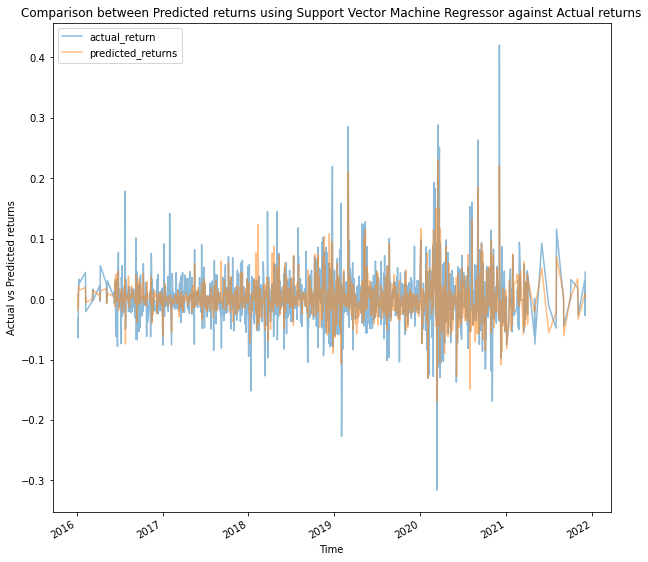

In [23]:
df_aapl['predicted_returns'] = svr_model2.predict(X)
df_aapl[['actual_return','predicted_returns']].plot(alpha = 0.5, figsize = (10,10))
plt.xlabel('Time')
plt.ylabel('Actual vs Predicted returns')
plt.title('Comparison between Predicted returns using Support Vector Machine Regressor against Actual returns')

Text(0.5, 1.0, 'Comparison between predicted returns against actual returns using SVR')

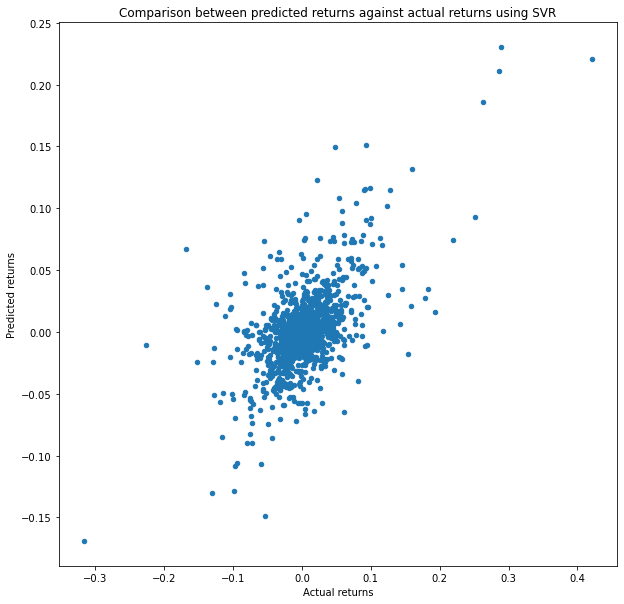

In [24]:
df_aapl.plot.scatter(x = 'actual_return', y = 'predicted_returns', figsize = (10,10))
plt.xlabel('Actual returns')
plt.ylabel('Predicted returns')
plt.title('Comparison between predicted returns against actual returns using SVR')

Based on the above, our model actually predicts with relatively good accuracy where the returns is between -0.05 to 0.05. 

# Signal generation logic

Depending on the predictions, we will buy the stock at open price and sell the stock at close price in the same day where the returns is positive. Conversely, we will short-sell the stock at open price and complete the short-sell at the close price where the returns is negative. 

Based on our model, it appears that it is relatively accurate where the returns range from -0.05 (negative returns) and 0.05 (positive returns). Accordingly, we will generate our signals based on the following:
 * Where the return is above 0 and below 0.05, the returns will be positive and we will designate a signal of 1. 
 * Where the return is below 0 and above -0.05, the returns will be negative and we will designate a signal of -1. 
 * Otherwise, we will designate a signal of 0 indicating no signal is generated. 

In [25]:
def returns_to_class(df):
    if df.predicted_returns > 0.0 and df.predicted_returns < 0.05:
        return 1
    elif df.predicted_returns < 0.0 and df.predicted_returns > -0.05:
        return -1
    else:
        return 0

df_aapl['Class'] = df_aapl.apply(returns_to_class, axis=1)

In [26]:
df_aapl.groupby('Class')['predicted_returns'].count()

Class
-1    553
 0    116
 1    542
Name: predicted_returns, dtype: int64

Once we have defined the different classes for the target variable, we can see their distribution of Returns using the groupby method. As can be observed, out of the total data points majority of them (i.e. 553 data points) belong to '-1' class which signifies negative returns. On the other hand, there are 542 data points belonging to '1', which signifies positive returns. 

In [27]:
df_aapl.reset_index('Date', inplace=True)

In [28]:
signal_list = ['Date','Class', 'predicted_returns']
df_signal = df_aapl[signal_list]
df_signal

,Date,Class,predicted_returns
0,2016-09-06,-1,-0.007337
1,2016-10-06,1,0.015644
2,2016-06-13,1,0.034228
3,2016-06-14,1,0.006963
4,2016-06-15,1,0.009796
...,...,...,...
1206,2021-03-25,-1,-0.005521
1207,2021-03-26,-1,-0.013019
1208,2021-03-29,-1,-0.013802
1209,2021-03-30,1,0.011989


In [29]:
df_signal.set_index('Date', inplace=True)

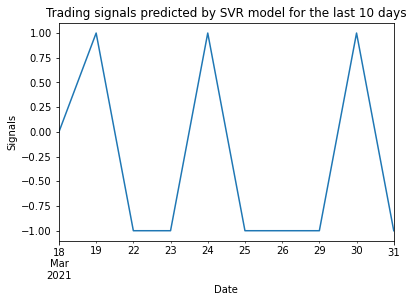

In [30]:
df_signal.Class[-10:].plot()
plt.ylabel('Signals')
plt.title('Trading signals predicted by SVR model for the last 10 days')
plt.show()

The above graph shows the signal predicted for last 10 days. 

### Sharpe Ratio

Sharpe ratio helps to evaluate how good a strategy is. Generally, a strategy with a Sharpe ratio of > 1.5 is considered good (Lioudis 2021). 

The Sharpe ratio is calculated as follows:
 * Sharpe ratio  = (average daily strategy returns / standard deviation of the strategy returns) * sqrt(252)
 * 252 is the number of trading days in a year. We will assume the number to be 252. 

In [31]:
df_aapl['strategy_returns'] = df_aapl.actual_return * df_aapl.Class

In [32]:
# The below function returns the Sharpe ratio for the excess returns 
# (Strategy returns - Risk free rate) passed to it.
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

We calculate the Sharpe ratio for the strategy in train and test dataset. The risk-free rate is assumed to be 5% p.a (Chen 2021).

In [33]:
# Computing Sharpe ratio

df_aapl['excess_daily_strategy_return'] = df_aapl.strategy_returns - 0.05/252

# Train dataset
sharpe_train = annualized_sharpe_ratio(
    df_aapl.excess_daily_strategy_return.iloc[:split])

# Test dataset
sharpe_test = annualized_sharpe_ratio(
    df_aapl.excess_daily_strategy_return.iloc[split:])

In [34]:
# Tabulate the performance in train and test dataset
from tabulate import tabulate
print(tabulate(
    [
        ['Sharpe Ratio', sharpe_train, sharpe_test],
    ],
    headers=['Train set', 'Test Set'],
    tablefmt='orgtbl'))

|              |   Train set |   Test Set |
|--------------+-------------+------------|
| Sharpe Ratio |     4.40151 |    3.66644 |


# Visualising cumulative returns 

#### Cumulative returns in train set

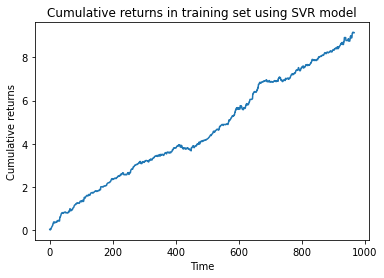

In [35]:
# Plot the cumulative returns in train dataset
df_aapl.strategy_returns[:split].cumsum().plot()

plt.xlabel('Time')
plt.ylabel('Cumulative returns')
plt.title('Cumulative returns in training set using SVR model')

# Show the graph
plt.show()

#### Cumulative returns in test set

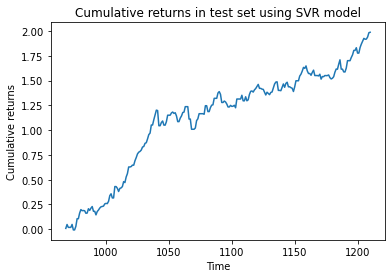

In [36]:
# Plot the cumulative returns in test dataset
df_aapl.strategy_returns[split:].cumsum().plot()

plt.xlabel('Time')
plt.ylabel('Cumulative returns')
plt.title('Cumulative returns in test set using SVR model')

# Show the graph
plt.show()

# References

Bhandari, A 2020, Feature scaling for machine learning: understanding the difference between normalisation vs standardization, Analytics Vidhya, viewed 20 April 2021, <https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ >

Chen, J 2021, Risk free rate of return, Investopedia, viewed 20 April 2021, < https://www.investopedia.com/terms/r/risk-freerate.asp >

De Prado, M.L 2018, Advances in financial machine learning, John Wiley & Sons, Inc., Hoboken, New Jersey

Hyndman, R.J., & Athanasopoulos, G 2021, Forecasting: principles and practice, 3rd Edition, OTexts: Melbourne, Australia, viewed on 20 April 2021, < https://otexts.com/fpp3 > 

Iordanova, T 2020, An introduction to stationary and non-stationary processes,  Investopedia, viewed 20 April 2021, < https://www.investopedia.com/articles/trading/07/stationary.asp >

Infonewt 2020, Visualising apple product release patterns, Infonewt, viewed 20 April 2021, < https://infonewt.com/apple-release-patterns > 

Jain, A 2016, A comprehensive beginner’s guide to create a time series forecast (with codes in Python and R), Analytics Vidhya, viewed 20 April 2021, < https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ >

Kuttruf, S 2019, Preserving memory in stationary time series, Towards Data Science, viewed 20 April 2021, < https://towardsdatascience.com/preserving-memory-in-stationary-time-series-6842f7581800 > 

Lioudis, N 2021, Understanding the sharpe ratio, Investopedia, viewed 20 April 2021, <https://www.investopedia.com/articles/07/sharpe_ratio.asp > 

Shah, I 2020, Historical stock price data in python, Towards Data Science, viewed 20 April 2021, < https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836 > 